# Magnonic Floquet Spin Hall  Insulator

In this notebook, I present the python code for one of my research papers [Scientific Reports 9, 7197 (2019)](https://doi.org/10.1038/s41598-019-43702-9). This paper studied Floquet topological phases of bilayer Heisenberg Hamiltonain on the honeycomb lattice given by

\begin{align}
 \mathcal{H} = J\sum_{\langle ij\rangle,\ell}{\bf S}_{i,\ell}\cdot {\bf S}_{j,\ell}+J_c\sum_{i}{\bf S}_{i}^T\cdot {\bf S}_{i}^B,
 \end{align}

where ${\bf S}_{i}$ is the spin vector at site  $i$ and $\ell$ labels the top ($T$) and bottom ($B$) layers. The first term is the intralayer coupling in each layer and $\langle ij\rangle$ denotes summation over nearest neighbor spin sites and the second term is the interlayer coupling between the spins on the top and bottom layer.  

I considered two different cases: 

 Case $(i)$.  $J>0, J_c >0$. The intralayer and interlayer couplings are antiferromagnetic
 
 Case $(ii)$.  $J<0, J_c >0$. The intralayer and interlayer couplings are ferromagnetic 
 
In both cases,  the net magnetization vanishes. We note that case $(ii)$ is manifested in the  bilayer honeycomb magnetic insulator CrI$_3$.  The rigorous mathematical details of the  analysis can be found in the paper referenced above.

In [1]:
%matplotlib inline

# Filter warnings
import warnings
warnings.filterwarnings("ignore")

# Data visualization
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Set font scale and style
plt.rcParams.update({'font.size': 15})

In [2]:
# import custom class
%run -i '../src/helper/floquet.py'
%run -i '../src/helper/floquet_chernN.py'

## 1. Undriven (static) magnon bands

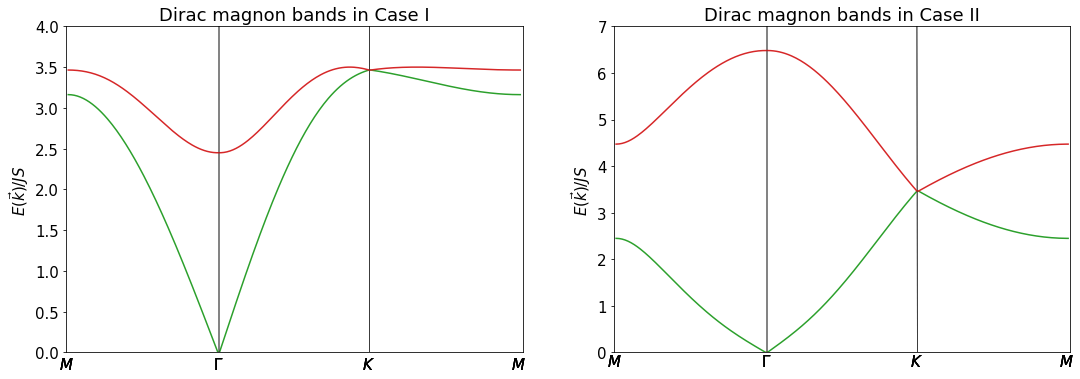

In [3]:
# set figure size
fig = plt.figure(figsize = (18,6))

# instantiate the class
band = FloquetQSHI(Ex=0,Ey=0,omega=0, phi=0,Jc=0.5)

# plots
plt.subplot(121)
band.plot_undriven_magnon_band_1(steps =100)
plt.title('Dirac magnon bands in Case I')
plt.ylabel(r'$E({\vec k})/JS$')
plt.rc('ytick') 

plt.subplot(122)
band.plot_undriven_magnon_band_2(steps =100)
plt.title('Dirac magnon bands in Case II')
plt.ylabel(r'$E({\vec k})/JS$')
plt.rc('ytick')
plt.savefig('../images/fig1.png')

## 2. Floquet topological magnon bands

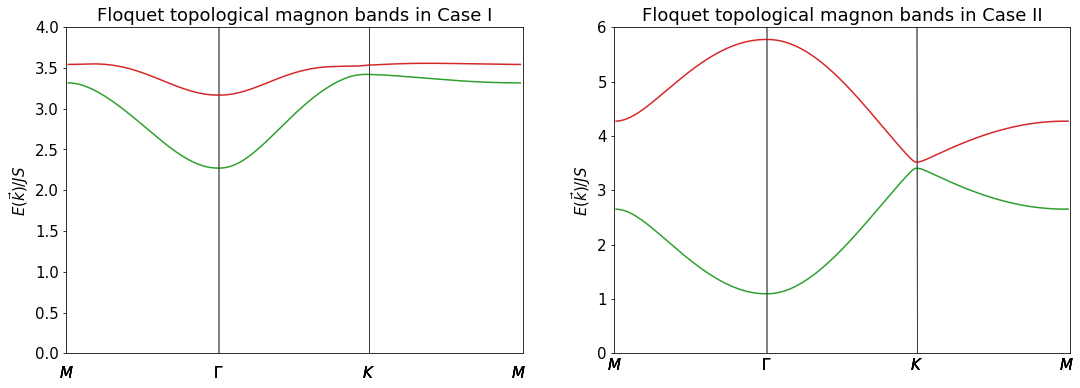

In [4]:
# set figure sizes
fig = plt.figure(figsize = (18,6))

# instantiate the class
band =FloquetQSHI(Ex=1,Ey=1,omega=10, phi=pi/2,Jc=0.5)

# plots
plt.subplot(121)
band.plot_Floquet_magnon_band_1(steps =100)
plt.title('Floquet topological magnon bands in Case I')
plt.ylabel(r'$E({\vec k})/JS$')
plt.rc('ytick') 

plt.subplot(122)
band.plot_Floquet_magnon_band_2(steps =100)
plt.title('Floquet topological magnon bands in Case II')
plt.ylabel(r'$E({\vec k})/JS$')
plt.rc('ytick')
plt.savefig('../images/fig2.png')

## 3. Chern numbers

In [5]:
band = FloquetQSHI(Ex=1,Ey=1,omega=10, phi=pi/2,Jc=0.5) # instantiate the class
print('Chern numbers = {}'.format(band.ChernN_2(steps = 20)))

Chern numbers = [ 1. -1.  1. -1.]


## 4. Chern number topological phase diagram
The plot of Chern number topological phase diagram for case I, i.e. antiferromagnetically coupled layers

In [ ]:
# set figure size
fig = plt.figure(figsize = (20,6))

# instantiate the class
band = FloquetChernN(omega=10, Jc=0.5)

steps = 10
Nk = 400 # increase the value for a smooth plot

# subplot 1
plt.subplot(121)
band.plot_chernN_phase(steps=steps, Nk=Nk)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\mathcal {E}_x = \mathcal {E}_y$')
plt.text(1.5, 1.0, r'$\nu = -1$')
plt.text(2.9, 2.0, r'$\nu = 0$')
plt.text(4, 1.0, r'$\nu = +1$')
plt.xticks((0, pi/2, pi, 3*pi/2, 2*pi),
           (r'$0$',r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'),
           color='k'
          )
plt.axis([0,2*pi,0,3.4])
plt.rc('xtick')
plt.rc('ytick')
plt.title(r'Chern number topological phase diagram for $\mathcal {E}_x = \mathcal {E}_y$')
plt.grid(False)

# subplot 2
plt.subplot(122)
band.plot_chernN_phase_(steps=steps, Nk=Nk)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\mathcal {E}_y = \sqrt{3}\mathcal {E}_x$')
plt.text(1.5, 0.5, r'$\nu = -1$')
plt.text(2.9, 2.25, r'$\nu = 0$')
plt.text(4, 0.5, r'$\nu = +1$')
plt.xticks((0, pi/2, pi, 3*pi/2, 2*pi),
           (r'$0$',r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'),
           color='k'
          )
plt.axis([0,2*pi,0,3.4])
plt.rc('xtick')
plt.rc('ytick')
plt.title(r'Chern number topological phase diagram for $\mathcal {E}_y = \sqrt{3}\mathcal {E}_x$')
plt.grid(False)
plt.savefig('../images/fig3.png')

## 5. Floquet Edge States

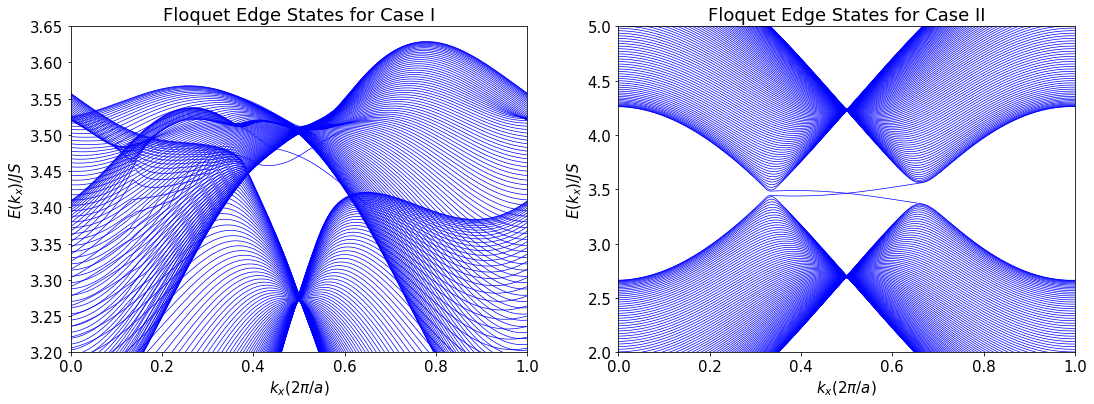

In [6]:
# Set figure 
fig = plt.figure(figsize = (18,6))

# Instantiate the class
band =FloquetQSHI(Ex=1,Ey=1,omega=10, phi=pi/2,Jc=0.5)

# Plots
plt.subplot(121)
band.plot_Floquet_states_1(steps=300,N=100)
plt.axis([0,1,3.2,3.65])
plt.title('Floquet Edge States for Case I')
plt.xlabel(r'$k_x(2\pi/a)$')
plt.ylabel(r'$E(k_x)/JS$')
plt.rc('xtick')
plt.rc('ytick')

plt.subplot(122)
band.plot_Floquet_states_2(steps=300,N=100)
plt.axis([0,1,2,5])
plt.title('Floquet Edge States for Case II')
plt.xlabel(r'$k_x(2\pi/a)$')
plt.ylabel(r'$E(k_x)/JS$')
plt.rc('xtick')
plt.rc('ytick')
plt.savefig('../images/fig4.png')